# MTA Data Challenges

In [1]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter

### Challenge 1

In [2]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0   566k      0 --:--:--  0:00:43 --:--:--  579k


In [3]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [4]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [5]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

`raw_readings` is a solution to Challenge 1.

### Challenge 2

In [18]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [52]:
print datetime_cumulative.keys()[0]
datetime_cumulative[datetime_cumulative.keys()[0]]

('A030', 'R083', '01-06-00', '23 ST-5 AVE')


[(datetime.datetime(2015, 6, 20, 0, 0), 5938862),
 (datetime.datetime(2015, 6, 20, 4, 0), 5938915),
 (datetime.datetime(2015, 6, 20, 8, 0), 5938934),
 (datetime.datetime(2015, 6, 20, 12, 0), 5939047),
 (datetime.datetime(2015, 6, 20, 16, 0), 5939329),
 (datetime.datetime(2015, 6, 20, 20, 0), 5939679),
 (datetime.datetime(2015, 6, 21, 0, 0), 5939870),
 (datetime.datetime(2015, 6, 21, 4, 0), 5939929),
 (datetime.datetime(2015, 6, 21, 8, 0), 5939946),
 (datetime.datetime(2015, 6, 21, 12, 0), 5940029),
 (datetime.datetime(2015, 6, 21, 16, 0), 5940234),
 (datetime.datetime(2015, 6, 21, 20, 0), 5940488),
 (datetime.datetime(2015, 6, 22, 0, 0), 5940637),
 (datetime.datetime(2015, 6, 22, 4, 0), 5940660),
 (datetime.datetime(2015, 6, 22, 7, 33, 53), 5940726),
 (datetime.datetime(2015, 6, 22, 7, 35, 9), 5940728),
 (datetime.datetime(2015, 6, 22, 8, 0), 5940768),
 (datetime.datetime(2015, 6, 22, 12, 0), 5941224),
 (datetime.datetime(2015, 6, 22, 16, 0), 5941639),
 (datetime.datetime(2015, 6, 22, 

In [21]:
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [55]:
[(i,j)   for i in range(5) for j in range(3,6)]

[(0, 3),
 (0, 4),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 3),
 (4, 4),
 (4, 5)]

In [22]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [30]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]

[2428, 2443, 2444, 2447, 2448, 2455, 2456, 2459, 2473, 2474, 2487, 2492, 2514, 2521, 2536, 2548, 2552, 2554, 2558, 2567, 2569, 2579, 2602, 2612, 2621, 2622, 2630, 2630, 2644, 2656, 2670, 2671, 2692, 2728, 2731, 2757, 2765, 2804, 2844, 2848, 2920, 2926, 2926, 3488, 87577, 130932, 131711, 131792, 531430, 117440499]


In [31]:
print all_counts[:1200]

[-1208464910, -8664797, -7691983, -1958436, -1283643, -531174, -131370, -131215, -130432, -87562, -73467, -65355, -2545, -1929, -1852, -1782, -1720, -1703, -1687, -1677, -1662, -1659, -1645, -1608, -1572, -1571, -1553, -1543, -1533, -1524, -1492, -1484, -1482, -1455, -1410, -1404, -1403, -1402, -1401, -1397, -1378, -1376, -1362, -1357, -1345, -1339, -1332, -1326, -1323, -1311, -1303, -1302, -1299, -1292, -1290, -1290, -1289, -1268, -1263, -1260, -1257, -1246, -1236, -1233, -1226, -1217, -1205, -1196, -1194, -1184, -1182, -1136, -1133, -1130, -1130, -1126, -1120, -1119, -1116, -1113, -1111, -1105, -1094, -1092, -1089, -1086, -1084, -1079, -1077, -1071, -1065, -1059, -1058, -1044, -1036, -1035, -1028, -1021, -1021, -1012, -1000, -995, -994, -991, -991, -978, -968, -965, -965, -962, -957, -957, -954, -952, -943, -937, -933, -932, -930, -919, -911, -908, -886, -885, -884, -882, -882, -873, -871, -869, -868, -862, -858, -842, -840, -838, -832, -825, -822, -820, -818, -814, -813, -801, -800,

In [29]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 172791), (4.2, 10460), (8.0, 189), (4.433333333333334, 161), (0.02222222222222222, 80), (0.02277777777777778, 64), (0.022500000000000003, 55), (0.02777777777777778, 26), (0.03611111111111111, 24), (3.963888888888889, 24)]


In [32]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

`datetime_counts` is a solution to Challenge 2.

In [34]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / len(all_counts)

0.99415985405


In [35]:
all_good_counts.sort()
print all_good_counts[-5:]

[2848, 2920, 2926, 2926, 3488]


In [36]:
print all_good_counts[:5]

[0, 0, 0, 0, 0]


### Challenge 3

In [37]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

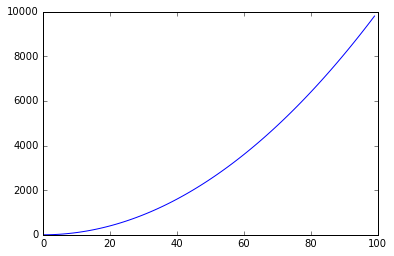

In [58]:
import matplotlib.pyplot as plt
% matplotlib inline
x = range(100)
plt.plot(x,[i**2 for i in x])


`day_counts` is a solution to Challenge 3.